<a href="https://colab.research.google.com/github/sksamima5/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.**#
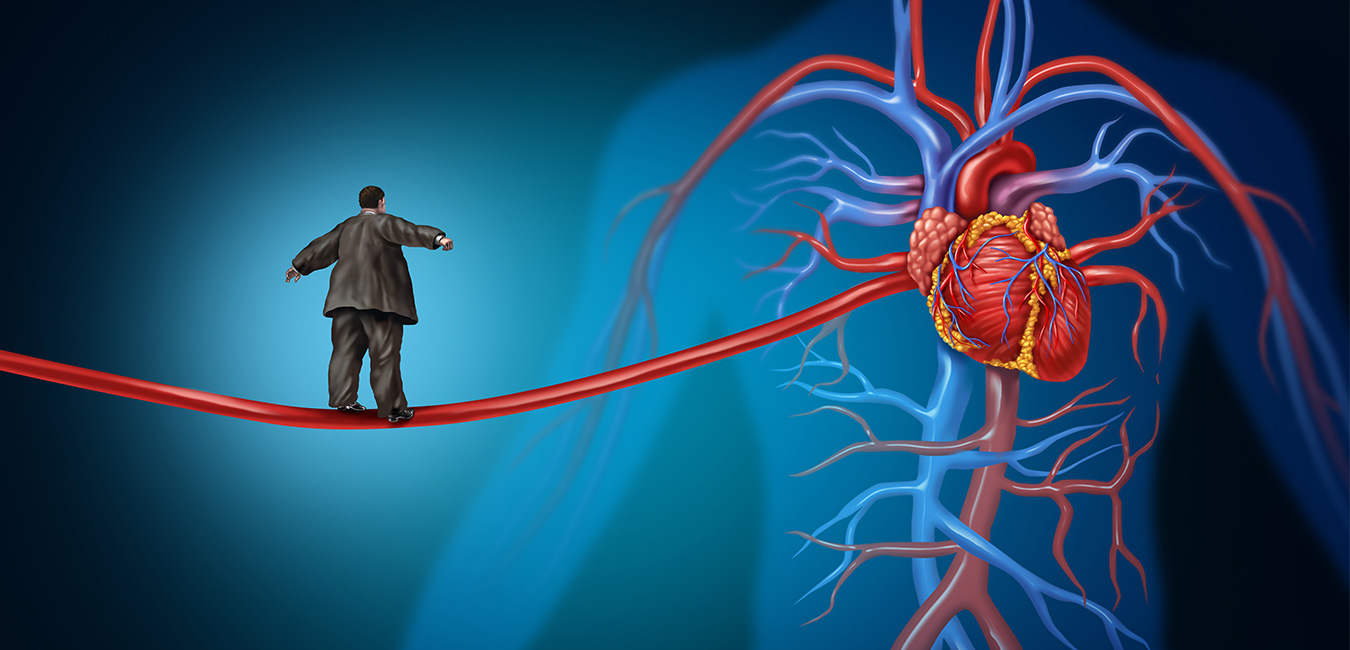


## <b> Data Description </b>

###**Demographic:**###
*  Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

###**Behavioral**###
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

###**Medical(history)**###
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

###**Medical(current)**###
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

###**Predict variable (desired target)**###
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

##**The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**##

#**Installing Modules**#

In [20]:
#install xbgoost
!pip install xgboost
#install lime and Shap
!pip install lime
!pip install shap
!pip install eli5
#install dtreeviz for visualizing decision tree
!pip install dtreeviz
#installing pandas-profiling
!pip install pandas-profiling==2.7.1

!pip install imgaug==0.2.7
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 12.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=13b66f201257fe755bf07d9ed32086aa927b18a420ca866e717ee807f6086c5a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 14.6 MB/s 
     |████████████████████████████████| 133 kB 64.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3df6e

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


#**Importng the Libraries**#

In [21]:
# Importing required libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# Import Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Import evalution matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc

# Imports for visualizing Decision Tree
from sklearn.datasets import*
from sklearn.tree import*
from IPython.display import Image,display_svg,SVG
from dtreeviz.trees import dtreeviz
from sklearn import tree
from dtreeviz.trees import *

# Importing model explainability
import lime
from lime import lime_tabular
import eli5 as eli
import shap

In [145]:
#Importing Dataset to create dataframe
heart_data = pd.read_csv('/content/drive/MyDrive/Capstone project ml classification cardiovascular risk prediction/data_cardiovascular_risk.csv')
heart_data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [146]:
#checking the shape of dataframe
heart_data.shape

(3390, 17)

In [147]:
#checking top 5 rows of data
heart_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [148]:
#checking bottom 5 rows of data
heart_data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [149]:
#Dropping the id column because it not so important for our analysis
heart_data.drop(columns=['id'], inplace=True)

In [150]:
#Checking the shape of Dataset with rows and columns 
print(f' The shape of dataset is {(heart_data.shape)} \n Total Rows are : {(heart_data.shape)[0]}\n Total Columns are : {(heart_data.shape)[1]}')

 The shape of dataset is (3390, 16) 
 Total Rows are : 3390
 Total Columns are : 16


In [151]:
#Checking deatils about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [152]:
#Checking all the columns of dataset
print(f'All the columns in the dataset:')
heart_data.columns

All the columns in the dataset:


Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [153]:
#Checking the Null/Missing values
heart_data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [154]:
#checking the description of dataset
heart_data.describe(include = 'all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


#**Missing value treatment**#

In [155]:
# Missing data counts
missing = heart_data.columns[heart_data.isnull().any()].tolist()

print('Missing Data Count')
print(heart_data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------


In [156]:
#replace null values with median
for col in ['glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']:
  heart_data[col]= heart_data[col].fillna(heart_data[col].median())

In [157]:
#Checking the Null/Missing values
heart_data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#**Exploratory Data Analysis**#

In [158]:
# Lets check the discrete and continuous features
categorical_features = [i for i in heart_data.columns if heart_data[i].nunique()<=4]
numeric_features = [i for i in heart_data.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


#**Handling Outliers**#

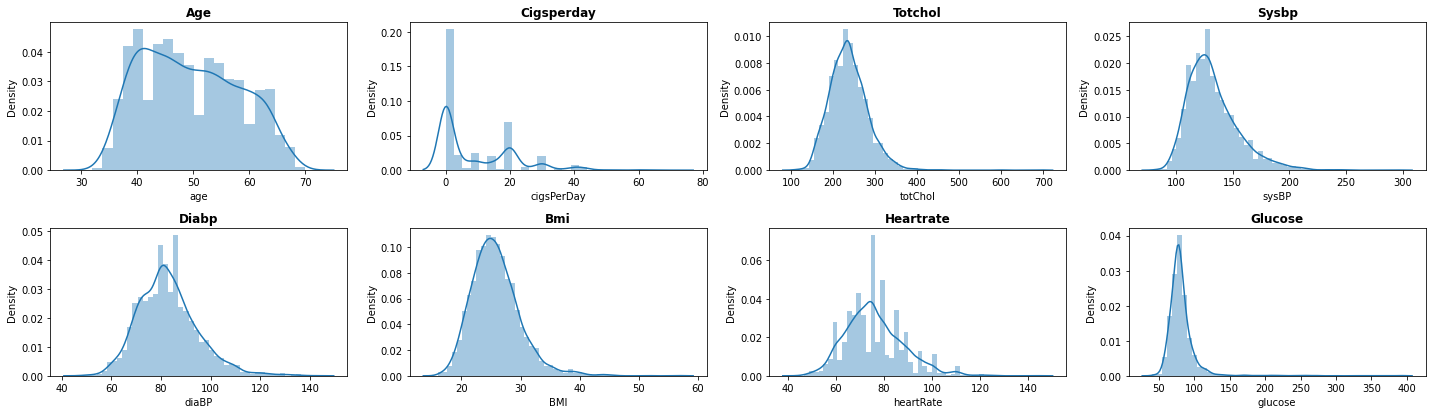

In [159]:
# Visualizing the distributions in distplot.
plt.figure(figsize=(20,14))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(heart_data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

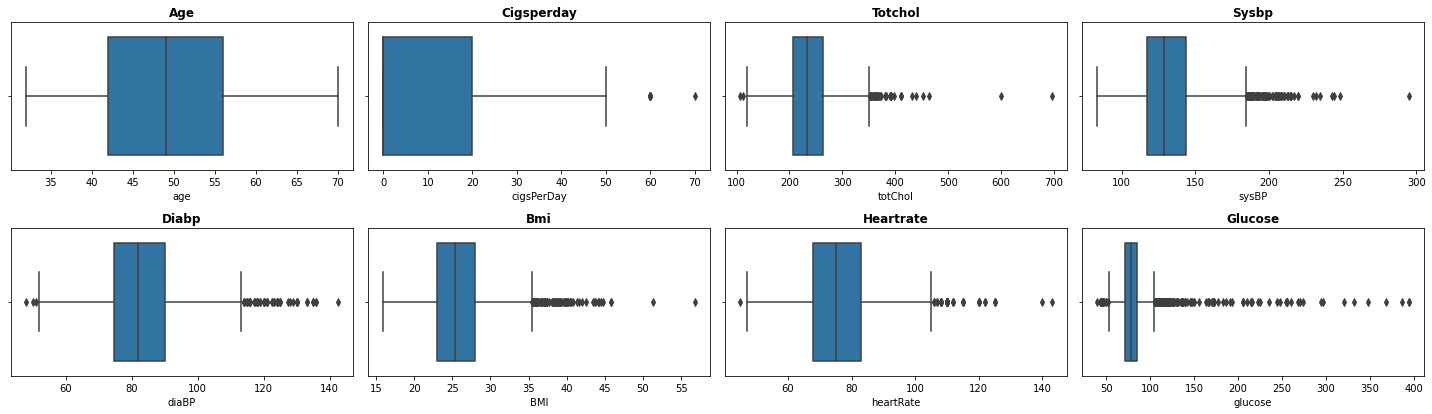

In [163]:
# Visualizing the distributions in boxplot.
plt.figure(figsize = (20,14))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(heart_data[column])
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

<b> Visualization is the easiest way to have an inference about the overall data and the outliers.

##**Removing Outliers by standard Methods and plotting graphs**##

In [164]:
#Lets make a copy of dataset
df = heart_data.copy()

#Using IQR method to define inliners
for col in numeric_features:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

In [165]:
#removing outliers with median value
df[col] = np.where(df[col]>upper_limit, median,np.where(df[col]<upper_limit,median,df[col]))

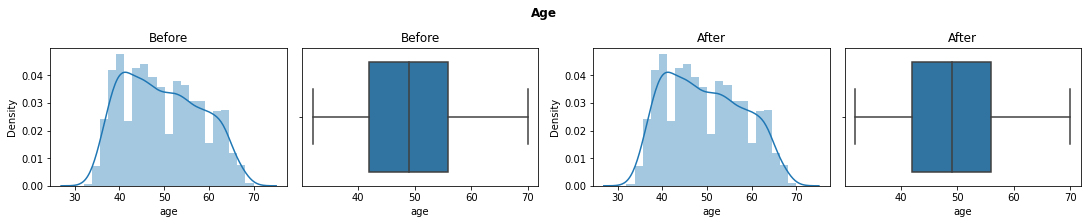

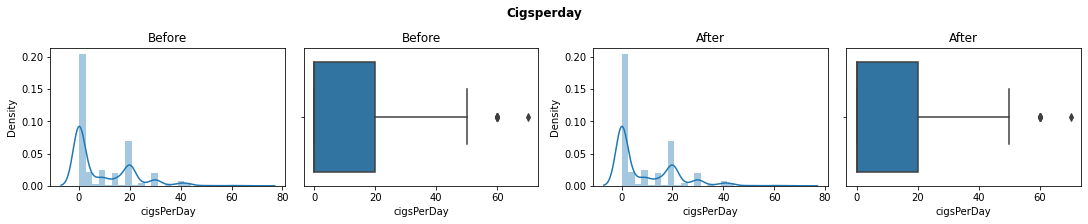

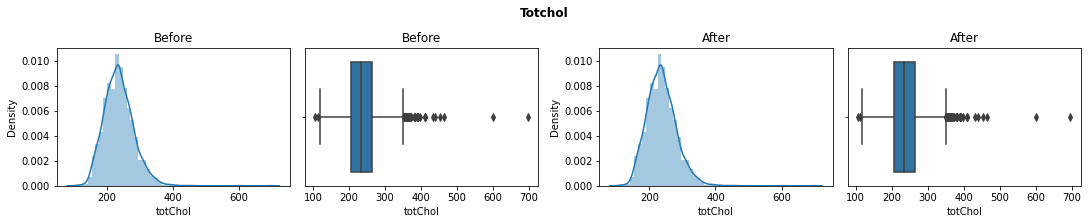

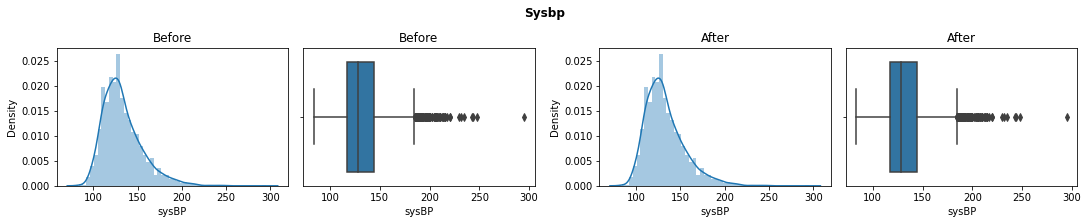

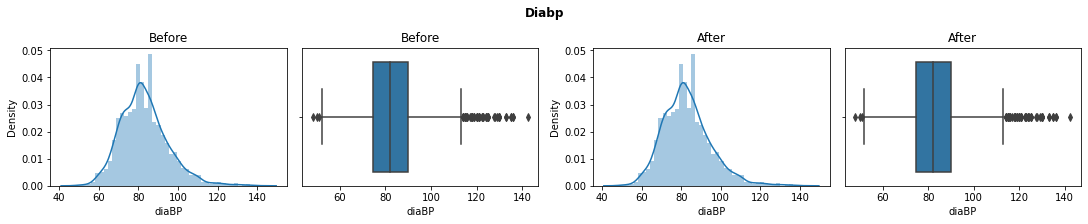

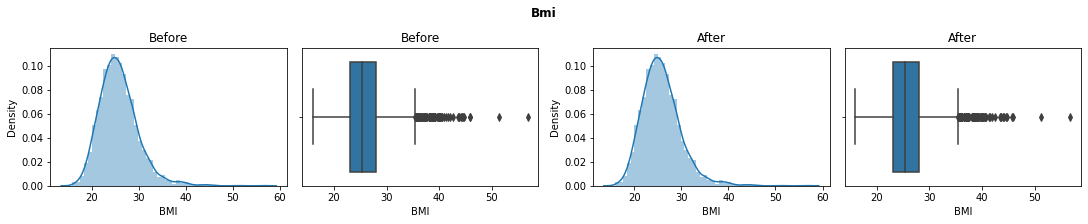

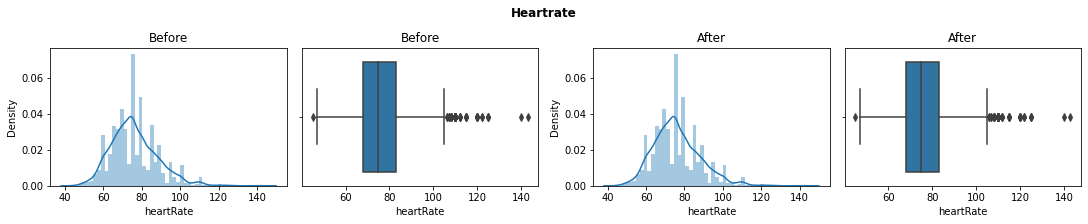

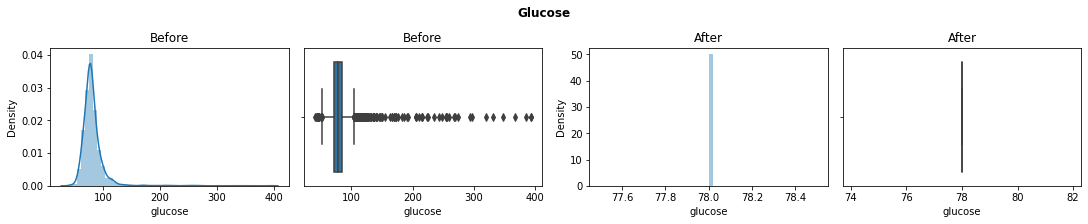

In [166]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(heart_data[col], ax=ax[0]).set(title="Before")
  sns.boxplot(heart_data[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

#**Cleaning and Manipulating Dataset**#

In [114]:
#checking for duplicates
print(len(df[df.duplicated()]))

0


In [119]:
#checking unique values with thier counts of categorical values
categorical_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [121]:
print(df['education'].value_counts())

1.0    1391
2.0    1077
3.0     549
4.0     373
Name: education, dtype: int64


In [122]:
print(df['sex'].value_counts())

F    1923
M    1467
Name: sex, dtype: int64


In [123]:
print(df['is_smoking'].value_counts())

NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [124]:
print(df['BPMeds'].value_counts())

0.0    3290
1.0     100
Name: BPMeds, dtype: int64


In [125]:
print(df['prevalentStroke'].value_counts())

0    3368
1      22
Name: prevalentStroke, dtype: int64


In [126]:
print(df['prevalentHyp'].value_counts())

0    2321
1    1069
Name: prevalentHyp, dtype: int64


In [127]:
print(df['diabetes'].value_counts())

0    3303
1      87
Name: diabetes, dtype: int64


In [128]:
print(df['TenYearCHD'].value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


So we need to encode two of our variables which is 'sex' and 'is_smoking'

In [129]:
# Defining a label encoder based on above data
encoder = {'sex':{'M': 1, 'F': 0}, 'is_smoking':{'NO':0, 'YES':1}}

In [131]:
#Label encoding
df = df.replace(encoder)

In [132]:
#now check the data
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,78.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,78.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,78.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,78.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,78.0,0


<b> Here we can clearly see that all the features are numerical in nature now.

#**Univariate Analysis**#

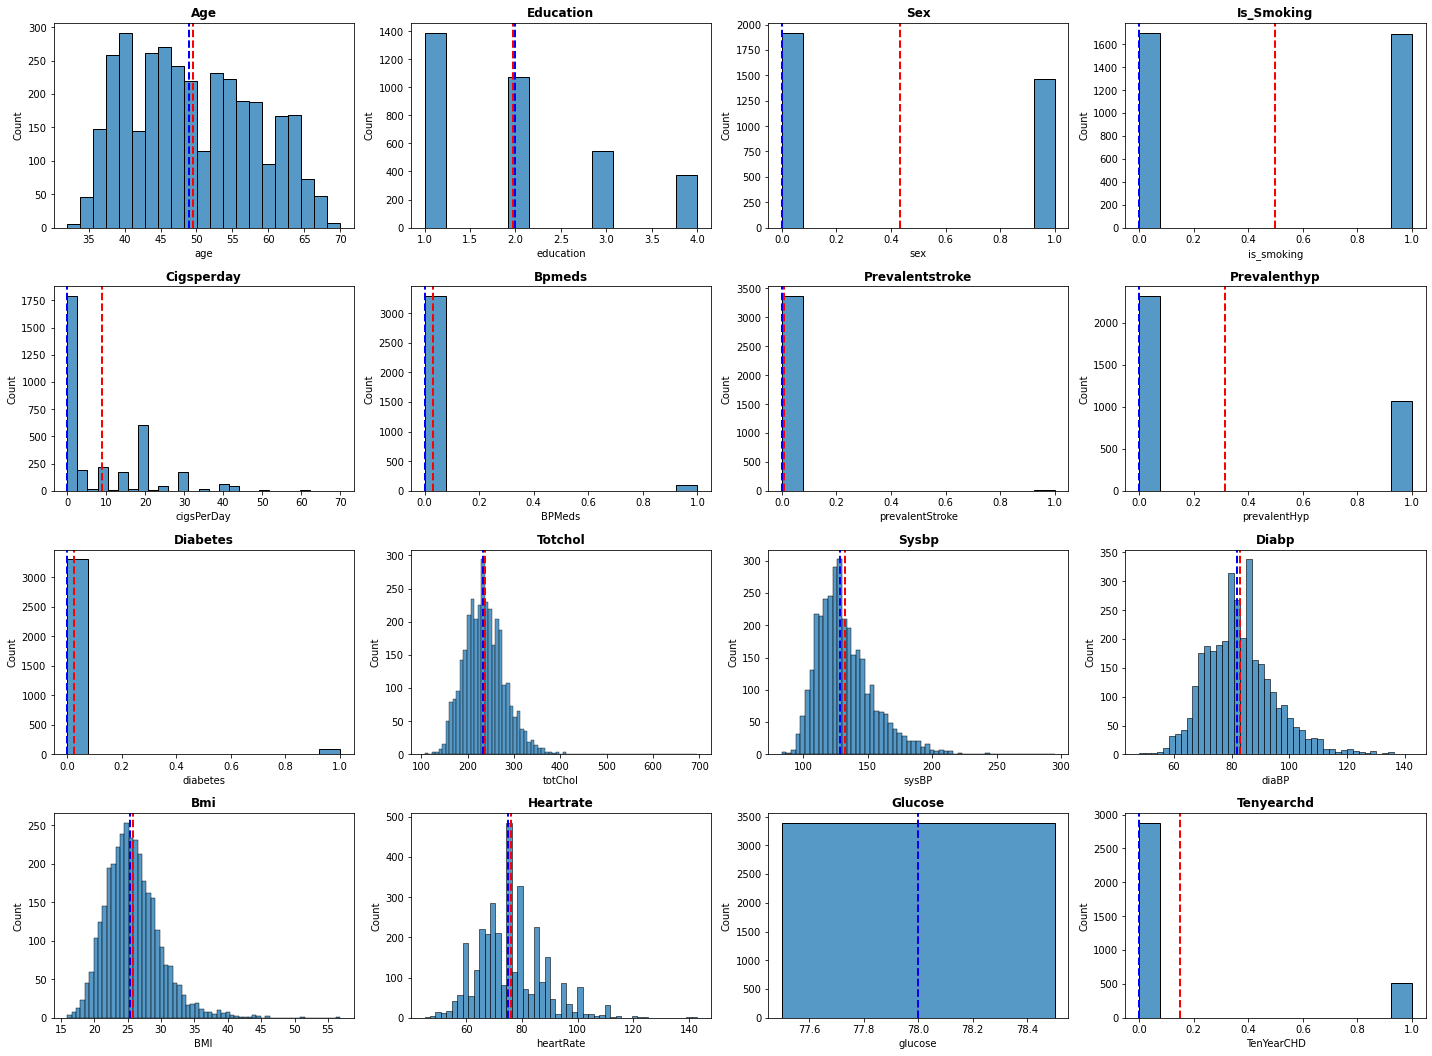

In [141]:
#Visualization of the mean and median for all the features
plt.figure(figsize=(20,18))
for n, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5,4,n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(),color = 'red', linestyle = 'dashed', linewidth=2)
  ax.axvline(feature.median(), color = 'blue', linestyle = 'dashed', linewidth = 2)
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

#**Bivariate Analysis**#

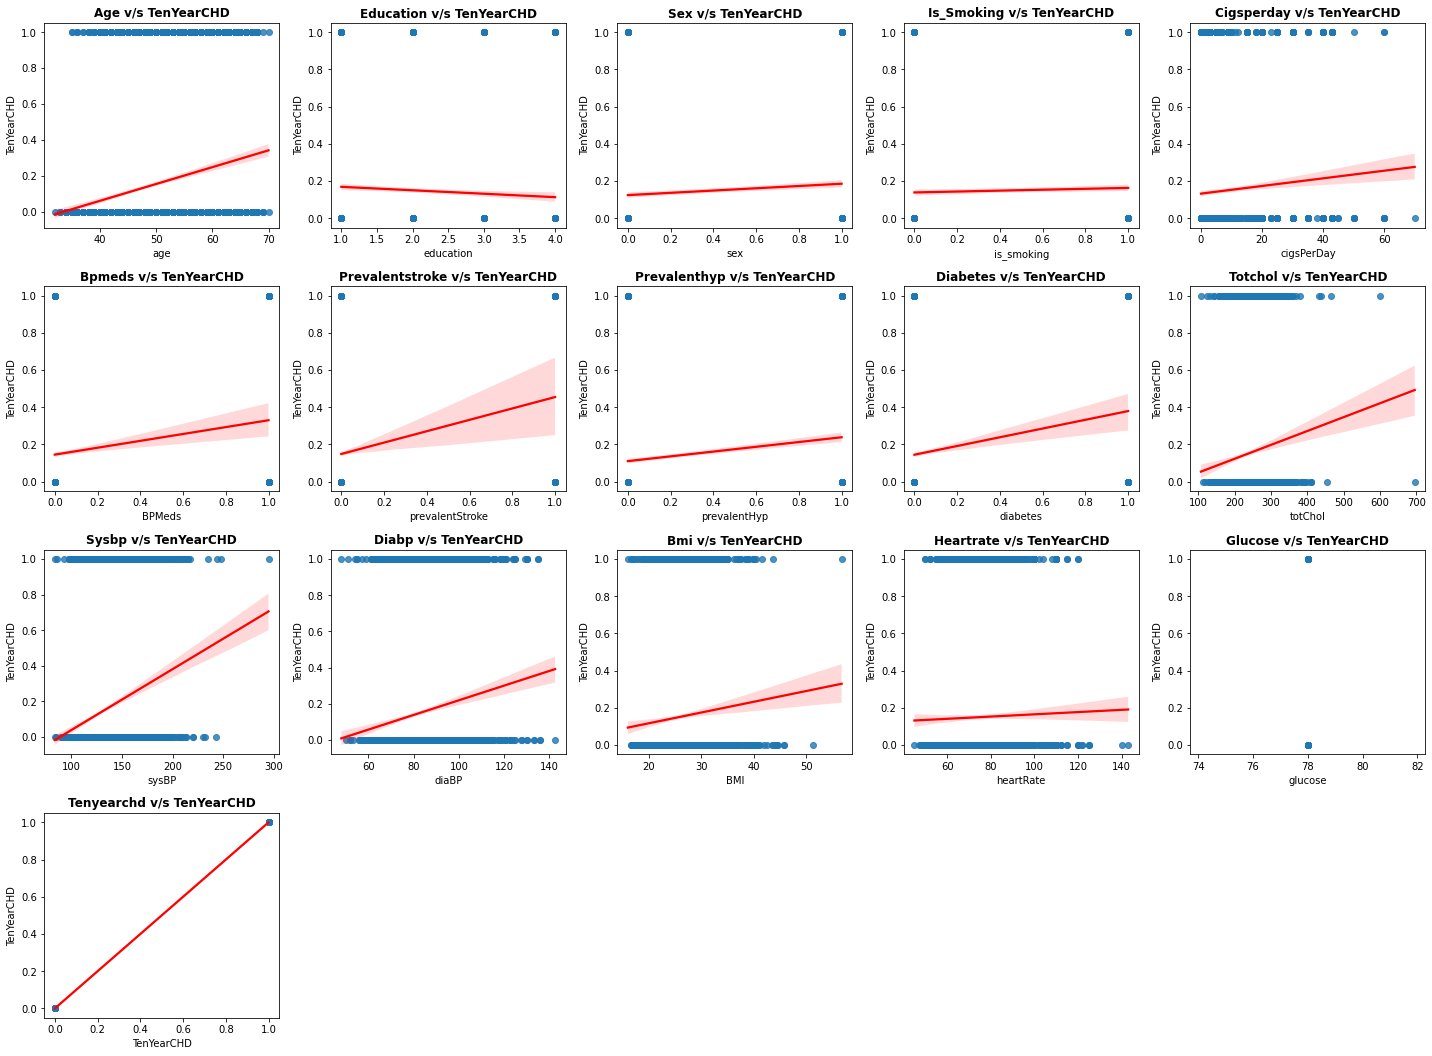

In [143]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
plt.figure(figsize=(20,18))
for n,column in enumerate(df.columns):
  plt.subplot(5,5,n+1)
  sns.regplot(x=df[column], y=df['TenYearCHD'], line_kws={'color':'red'})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()